In [26]:
import tensorflow as tf
import numpy as np

#可视化库
import PIL
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [27]:
# 表示池塘表面状态的函数
def DisplayArray(a, fmt='gif', rng=[0, 1]):
    '''display an array as a picture '''
    a = (a - rng[0])/float(rng[1] - rng[0])*255
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()


    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [28]:
sess = tf.InteractiveSession()
# 定义计算函数
def make_kernel(a):
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1, 1])
    return tf.constant(a, dtype=1)

def simple_conv(x, k):
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0, :, :, 0]

def laplace(x):
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
                            [1.0, -6, 1.0],
                            [0.5, 1.0, 0.5]])
    return  simple_conv(x, laplace_k)

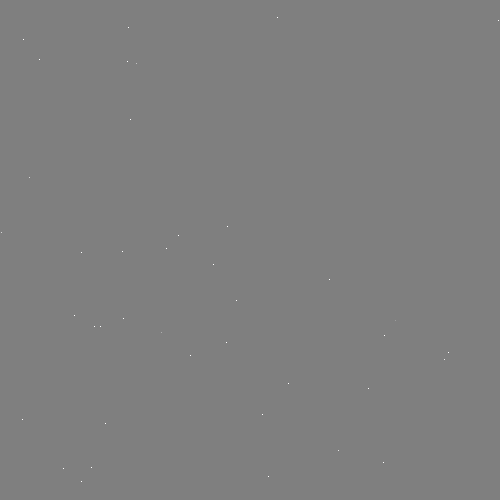

In [29]:
# 定义偏微分方程
# 池塘大小
N = 500

u_init = np.zeros([N, N], dtype='float32')
ut_init = np.zeros([N, N], dtype='float32')

for n in range(40):
    a, b = np.random.randint(0, N, 2)
    u_init[a, b] = np.random.uniform()
    
DisplayArray(u_init, rng=[-0.1, 0.1])

In [30]:
# 指定详细参数
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

U_ = U + eps + Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

step = tf.group(
    U.assign(U_),
    Ut.assign(Ut_)
    
)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


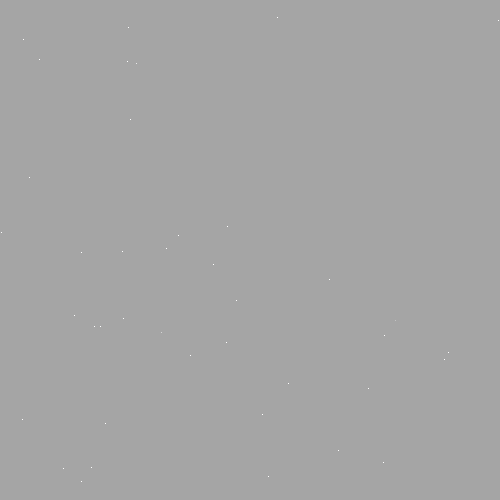

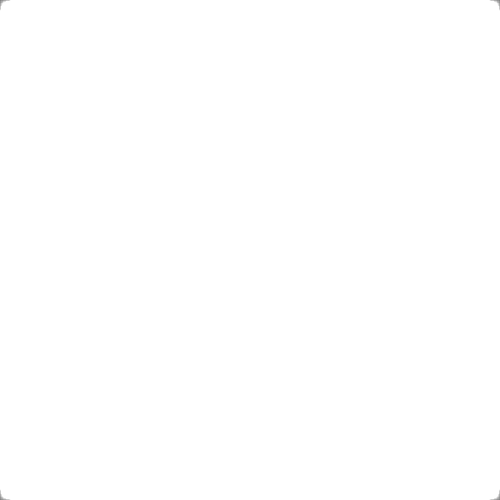

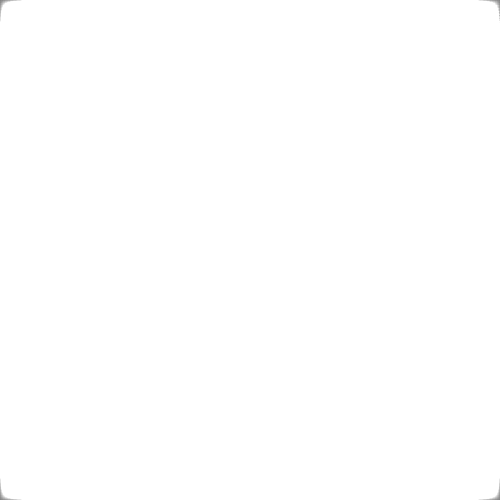

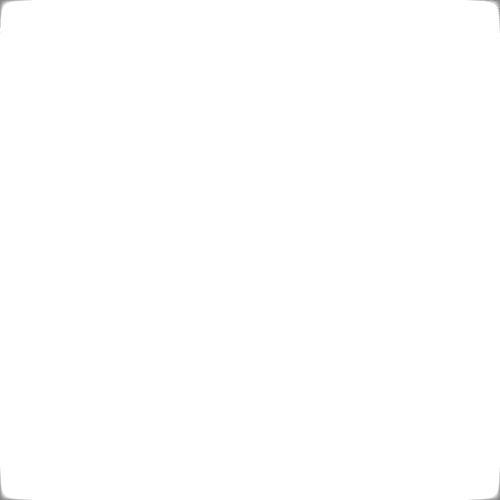

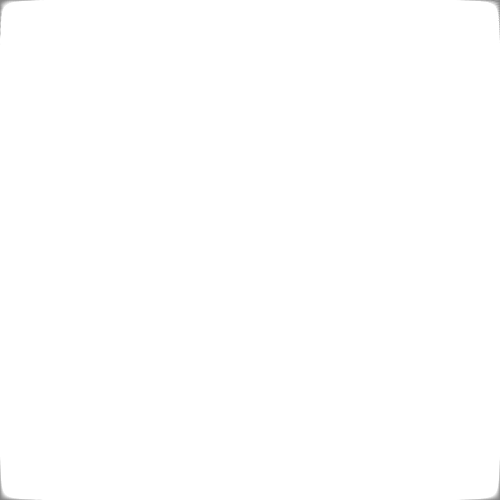

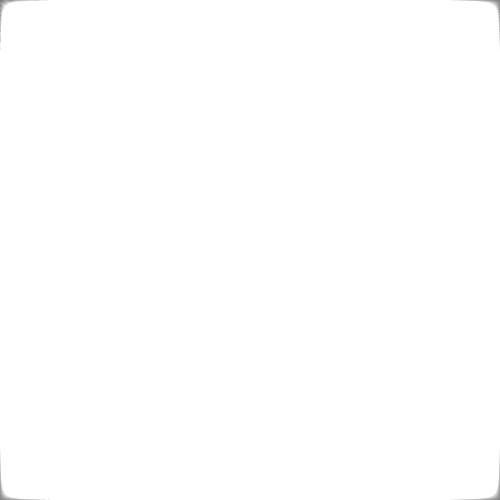

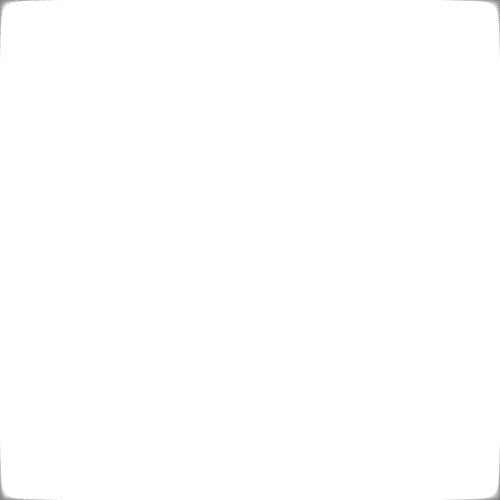

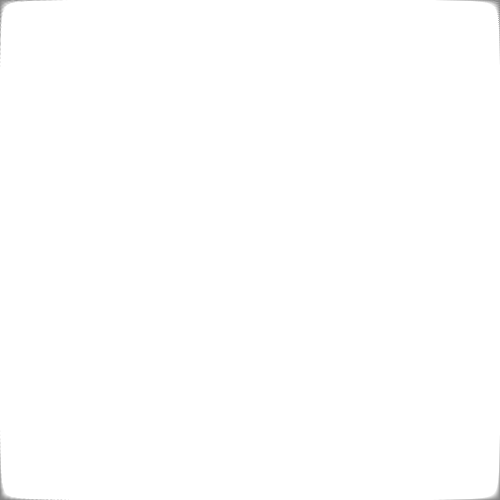

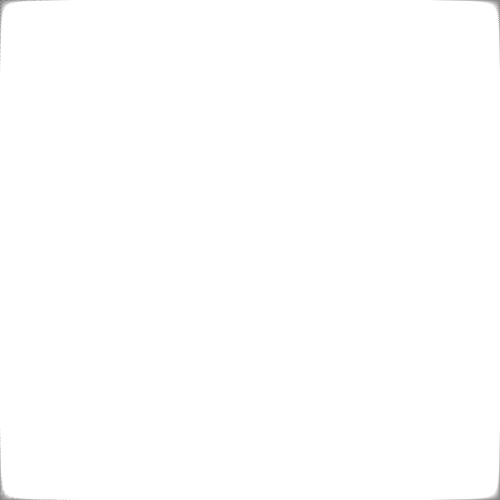

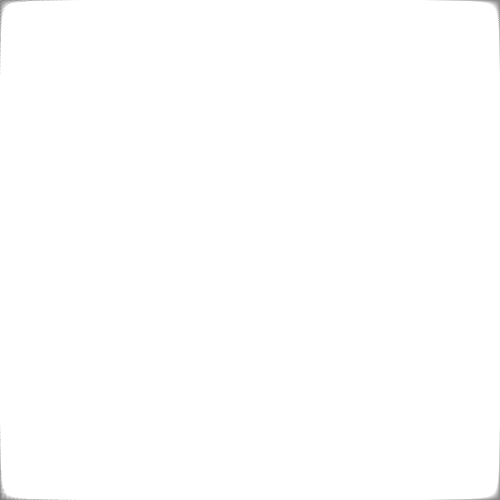

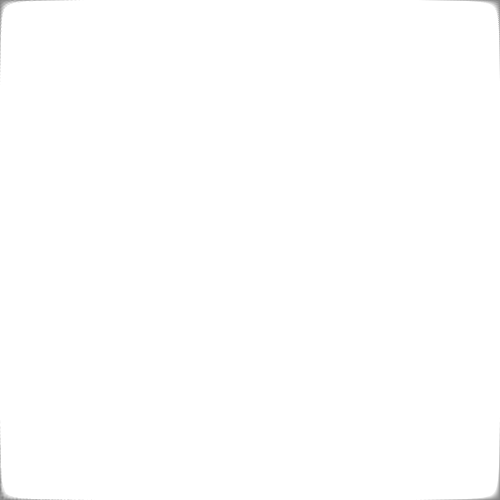

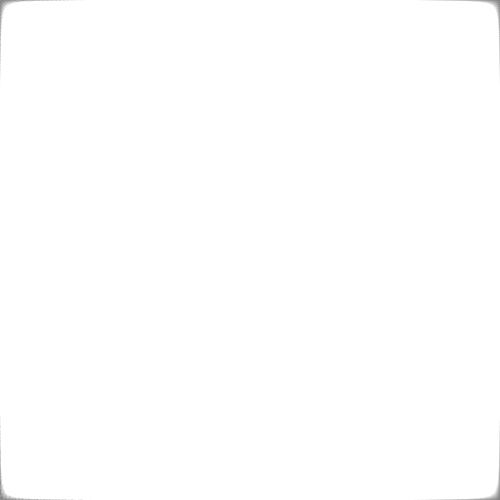

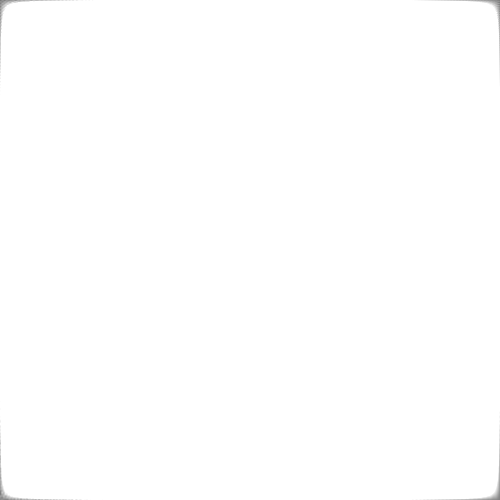

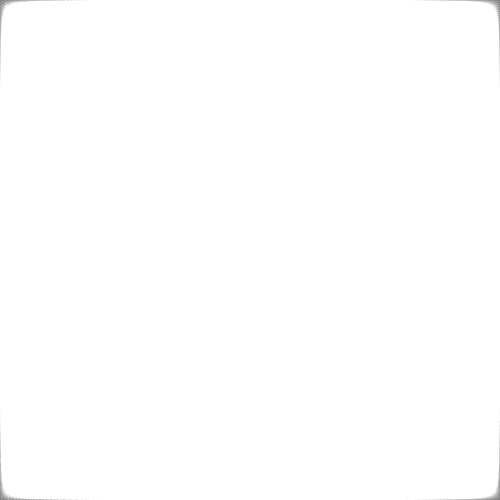

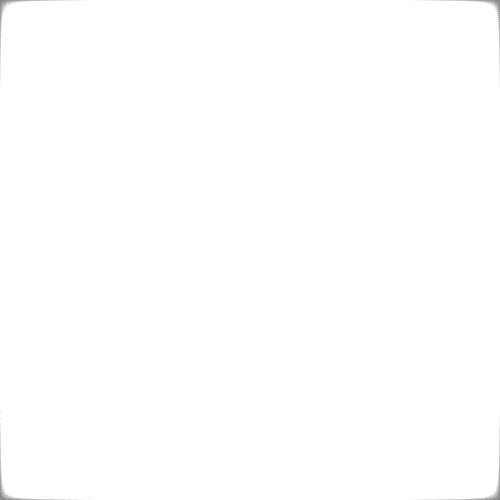

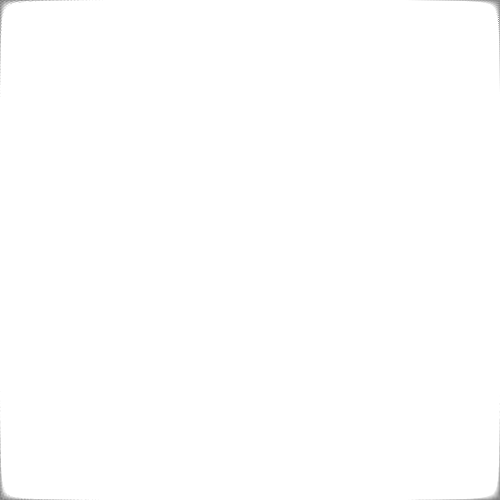

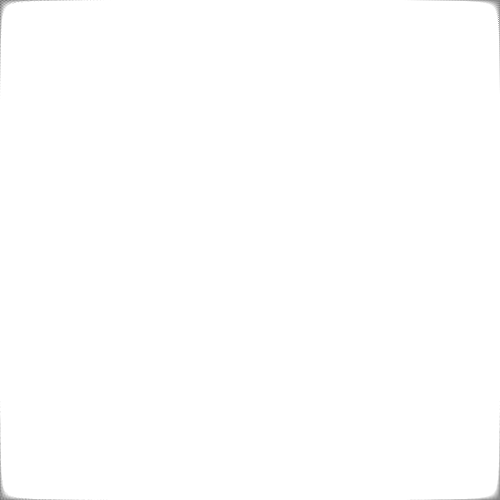

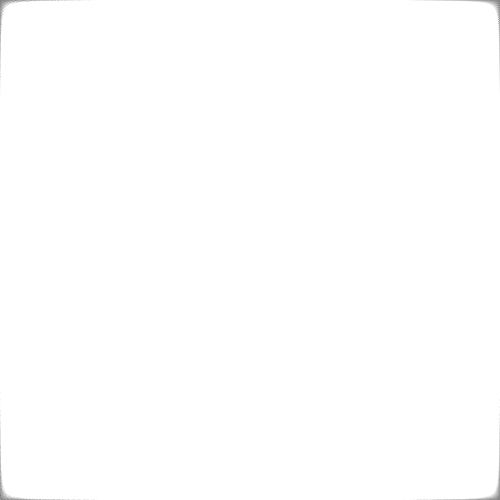

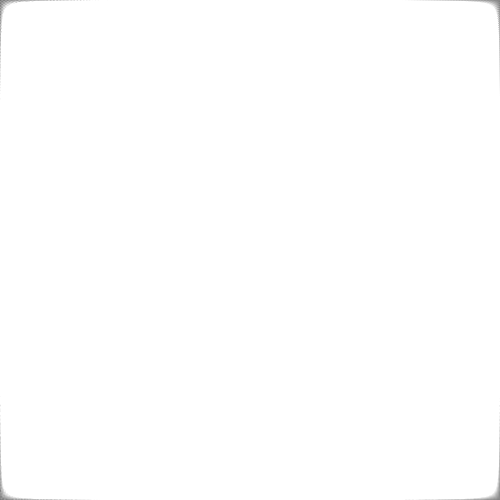

KeyboardInterrupt: 

In [31]:
# 开始仿真
tf.initialize_all_variables().run()

for i in range(1000):
    step.run({eps: 0.03, damping: 0.04})
    
    if i % 50 == 0:
        clear_output()
        DisplayArray(U.eval(), rng=[-0.1, 0.1])